In [4]:
import pandas
import numpy
from matplotlib import pyplot
import os
import ROOT

Welcome to JupyROOT 6.24/06


In [14]:
times = {"taskid":[],"mean":[],"meanerr":[],"throughput_MB_s":[]}
timedirs = ["timeresults_20x_16processes"]

dfs = []
for timedir in timedirs:
    print(timedir)
    procs = timedir.split("_")[2].replace("processes","")
    print(procs)
    for f in os.listdir(timedir):
        df = pandas.read_csv(os.path.join(timedir, f), header=None, names=["walltime","throughput"], skiprows=1)
        processid = f.split("_")[2].replace("process","").replace(".txt","")
        df["processid"] = int(processid)
        df["procs"] = int(procs)
        dfs.append(df)

df = pandas.concat(dfs)
df

timeresults_20x_16processes
16


,walltime,throughput,processid,procs
7.316,20912557385,135,13,16
6.994,21698872000,195,13,16
6.827,22366410813,252,13,16
6.734,23126236035,305,13,16
8.232,21337094745,132,7,16
...,...,...,...,...
6.811,21290892137,331,12,16
7.042,21002664183,134,3,16
7.549,21786016819,194,3,16
7.066,22447884339,251,3,16


In [19]:
df.groupby("processid").mean().sum()["throughput"]

3633.25

In [15]:
meantaskthroughput = df["throughput"].mean()
meantaskthroughput

227.078125

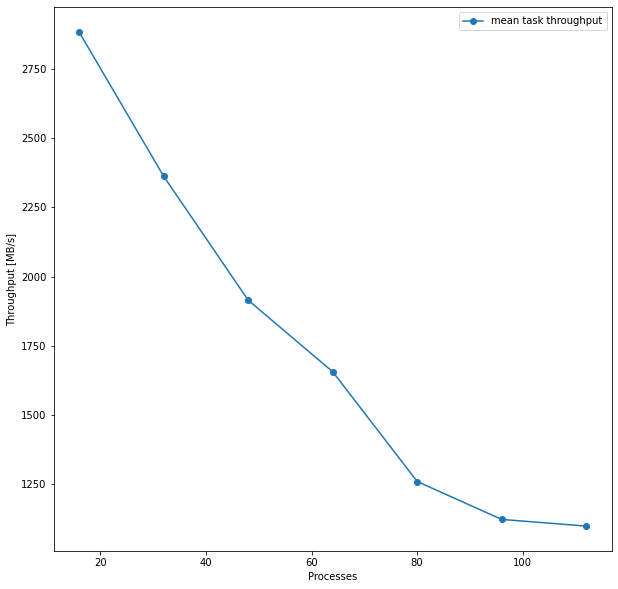

In [100]:
pyplot.figure(figsize=[10,10])
pyplot.plot(meantaskthroughput.chunks, meantaskthroughput["throughput"], label="mean task throughput", marker="o")
pyplot.xlabel("Processes")
pyplot.ylabel("Throughput [MB/s]")
pyplot.legend()

In [101]:
sumthroughput = df.groupby(["chunks","nodes","taskid"]).mean()
sumthroughput = sumthroughput.reset_index().groupby(["chunks","nodes"]).sum()
sumthroughput = sumthroughput.reset_index()
sumthroughput["totalthroughput"] = sumthroughput["throughput"] / 1024
sumthroughput

,chunks,nodes,taskid,walltime,throughput,totalthroughput
0,16,1,120,3.932590e+10,46147.444444,45.065864
1,32,2,496,4.830194e+10,75619.222222,73.846897
2,48,3,1128,6.416345e+10,91928.777778,89.774197
3,64,4,2016,7.866537e+10,106024.777778,103.539822
4,80,5,3160,1.025056e+11,100806.222222,98.443576
5,96,6,4560,1.108788e+11,107820.777778,105.293728
6,112,7,6216,1.047030e+11,123101.000000,120.215820


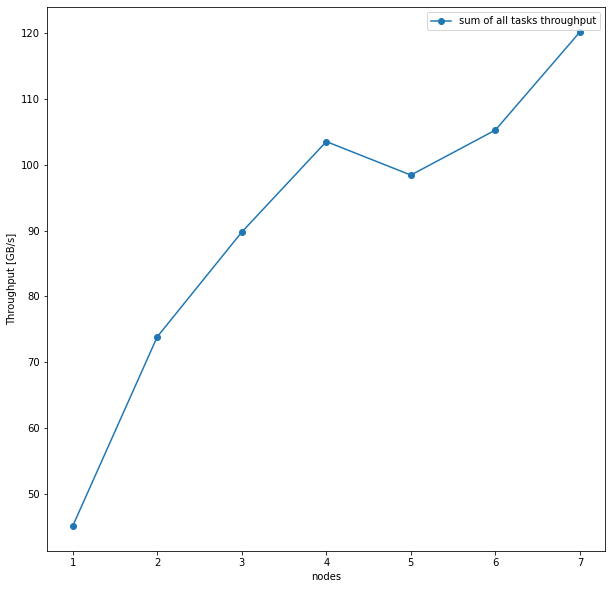

In [95]:
pyplot.figure(figsize=[10,10])
pyplot.plot(sumthroughput["nodes"], sumthroughput["totalthroughput"], label="sum of all tasks throughput", marker="o")
pyplot.xlabel("nodes")
pyplot.ylabel("Throughput [GB/s]")
pyplot.legend()

In [48]:
times = {"nodes":[],"meanruntime":[], "err":[], "throughput_MB_s":[]}
timedir = "appruntimes"
datasetsize = 157400503680
readpercent = 0.7949011466389114
readsize = readpercent * datasetsize

for f in os.listdir(timedir):
    array = numpy.genfromtxt(os.path.join(timedir, f), skip_header=1)
    print(f.split("_"))
    nodes = f.split("_")[5].replace("nodes.csv","")
    time_mean = numpy.mean(array)
    times["nodes"].append(int(nodes))
    times["meanruntime"].append(round(time_mean, 2))
    times["err"].append(round(numpy.std(array)/numpy.sqrt(len(array)), 2))
    times["throughput_MB_s"].append(round(readsize/time_mean/1024/1024))
    
timesdf = pandas.DataFrame(times)
timesdf = timesdf.sort_values(by="nodes").reset_index(drop=True).copy()
timesdf

['distrdf', 'lhcb', '100x', 'daos', '48chunks', '3nodes.csv']
['distrdf', 'lhcb', '100x', 'daos', '80chunks', '5nodes.csv']
['distrdf', 'lhcb', '100x', 'daos', '64chunks', '4nodes.csv']
['distrdf', 'lhcb', '100x', 'daos', '16chunks', '1nodes.csv']
['distrdf', 'lhcb', '100x', 'daos', '112chunks', '7nodes.csv']
['distrdf', 'lhcb', '100x', 'daos', '96chunks', '6nodes.csv']
['distrdf', 'lhcb', '100x', 'daos', '32chunks', '2nodes.csv']


,nodes,meanruntime,err,throughput_MB_s
0,1,30.10,1.21,3964
1,2,16.11,0.56,7405
2,3,12.14,0.76,9828
3,4,10.25,0.99,11644
4,5,9.72,1.09,12270
5,6,8.85,0.92,13484
6,7,6.93,0.04,17223


In [96]:
throughput_1node = timesdf["throughput_MB_s"][0]
timesdf["throughputspeedup"] = timesdf["throughput_MB_s"] / throughput_1node
timesdf

,nodes,meanruntime,err,throughput_MB_s,throughputspeedup
0,1,30.10,1.21,3964,1.000000
1,2,16.11,0.56,7405,1.868063
2,3,12.14,0.76,9828,2.479314
3,4,10.25,0.99,11644,2.937437
4,5,9.72,1.09,12270,3.095358
5,6,8.85,0.92,13484,3.401615
6,7,6.93,0.04,17223,4.344854


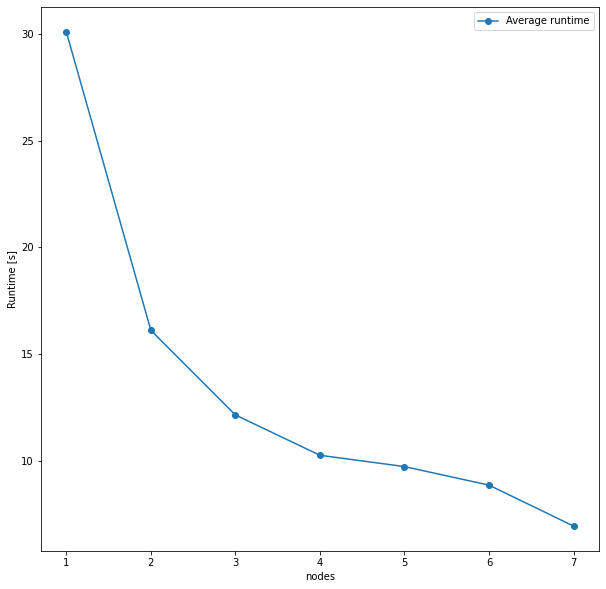

In [49]:
pyplot.figure(figsize=[10,10])
pyplot.plot(timesdf["nodes"], timesdf["meanruntime"], label="Average runtime", marker="o")
pyplot.xlabel("nodes")
pyplot.ylabel("Runtime [s]")
pyplot.legend()

In [104]:
120 / 17

7.0588235294117645